In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.image as mpimg

## Three different Gaussian random variables, i.e., $X1$, $X2$ and $X3$ with $0$ mean and $1$ variance. 

In [40]:
M = 2000
X1 = np.random.normal(0,1,M)
X2 = np.random.normal(0,1,M)
X3 = np.random.normal(0,1,M)
X = np.transpose(np.reshape(np.array([X1,X2,X3]),[3,M]))

## <font color='red'>1. Compute the covariance matrix of  $X1$, $X2$ and $X3$. Covariance matrix (CV) $$CV = \begin{bmatrix} cov(X1,X1) & cov(X1,X2)& cov(X1,X3)\\cov(X2,X1) & cov(X2,X2)& cov(X2,X3)\\cov(X3,X1) & cov(X3,X2)& cov(X3,X3)\end{bmatrix}.$$ Here, $$cov(X,Y)=E[XY]-E[X]E[Y]$$</font> 


In [43]:
def cov(data_mat,i,j):
    a = data_mat[:,i]
    b = data_mat[:,j]
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    temp = np.mean(a*b) - a_mean*b_mean
    return temp
        
def covmat(data_mat):
    size = len(data_mat[0])
    CV = np.zeros(shape=(size,size))
    for i in range(0,size):
        for j in range(0,size):
            CV[i][j] = cov(data_mat,i,j)
    return CV

[[ 1.04652999 -0.00501     0.04098531]
 [-0.00501     0.94940856 -0.03128088]
 [ 0.04098531 -0.03128088  1.07169917]]


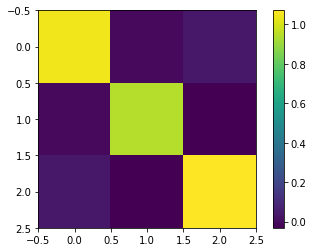

In [41]:
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## <font color='red'>2. Generate three random variables as $X1$, $X2$ and $X1+X2$. Compute the covariance matrix</font> 

[[ 1.03551368e+00 -9.15117241e-04  1.03459857e+00]
 [-9.15117241e-04  1.01431102e+00  1.01339591e+00]
 [ 1.03459857e+00  1.01339591e+00  2.04799447e+00]]


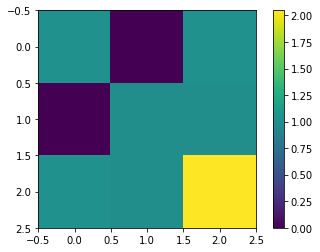

In [30]:
X1 =np.random.normal(0,1,M)
X2 =np.random.normal(0,1,M)
X3 = X1+X2
X = np.transpose(np.reshape(np.array([X1,X2,X3]),[3,M]))
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## <font color='red'>3. Generate covariance matrix of correlated data. Take face images as the data.</font> 

[[-16354.60012522 -14246.51604614 -14245.30647319 -14557.76122766
  -15987.5130235  -16533.85277879]
 [-14246.51604614 -12438.46267815 -12414.67478852 -12688.2016277
  -13937.5356198  -14412.66278925]
 [-14245.30647319 -12414.67478852 -12432.98480126 -12686.65473454
  -13933.34908939 -14409.73408491]
 [-14557.76122766 -12688.2016277  -12686.65473454 -12986.96458123
  -14241.61305505 -14728.08677508]
 [-15987.5130235  -13937.5356198  -13933.34908939 -14241.61305505
  -15669.1158713  -16174.92234759]
 [-16533.85277879 -14412.66278925 -14409.73408491 -14728.08677508
  -16174.92234759 -16748.9134148 ]]


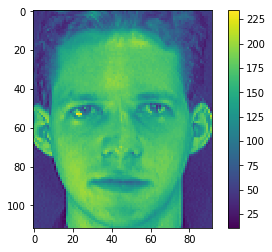

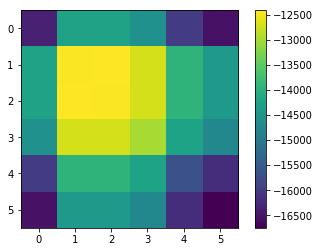

In [44]:
X1 = mpimg.imread('f1.pgm')
plt.imshow(X1)
plt.colorbar()
[m,n]=np.shape(X1)
X1 = X1.flatten()
X2 = mpimg.imread('f2.pgm').flatten()
X3 = mpimg.imread('f3.pgm').flatten()
X4 = mpimg.imread('f4.pgm').flatten()
X5 = mpimg.imread('f5.pgm').flatten()
X6 = mpimg.imread('f6.pgm').flatten()

X = np.transpose(np.reshape(np.array([X1,X2,X3,X4,X5,X6]),[6,m*n]))
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## <font color='red'>4. Show that data and noise are uncorrelated. Take Image files as your data and standard gaussian noise.</font> 

[[ 1.          0.68636406  0.54339369  0.5761928   0.37283632  0.30076674
   0.00530952]
 [ 0.68636406  1.          0.43642496  0.408871    0.32698807  0.11851373
  -0.009522  ]
 [ 0.54339369  0.43642496  1.          0.59856661  0.47363911  0.39708633
   0.01585393]
 [ 0.5761928   0.408871    0.59856661  1.          0.52145826  0.36015383
   0.0078224 ]
 [ 0.37283632  0.32698807  0.47363911  0.52145826  1.          0.28996448
  -0.01179037]
 [ 0.30076674  0.11851373  0.39708633  0.36015383  0.28996448  1.
   0.01017126]
 [ 0.00530952 -0.009522    0.01585393  0.0078224  -0.01179037  0.01017126
   0.98977498]]


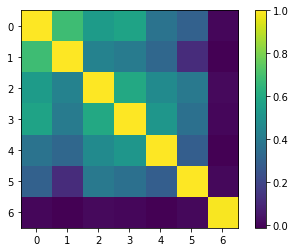

In [46]:
X1 = (X1-np.mean(X1))/np.std(X1) # FOR NORMALIZATION TO ZERO MEAN ONE VARIANCE
X2 = (X2-np.mean(X2))/np.std(X2)
X3 = (X3-np.mean(X3))/np.std(X3)
X4 = (X4-np.mean(X4))/np.std(X4)
X5 = (X5-np.mean(X5))/np.std(X5)
X6 = (X6-np.mean(X6))/np.std(X6)

XN = np.random.normal(0,1,m*n)
X = np.transpose(np.reshape(np.array([X1,X2,X3,X4,X5,X6,XN]),[7,m*n]))
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## Consider $X1$,$X2$ and $X3$ uniform random variables

[[ 8.29543533e-02 -8.82943441e-04  6.61840628e-05]
 [-8.82943441e-04  8.43073526e-02 -9.02631645e-04]
 [ 6.61840628e-05 -9.02631645e-04  8.20958791e-02]]


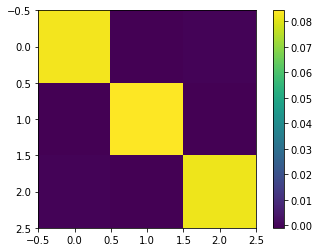

In [47]:
X1 = np.random.uniform(0,1,M)
X2 = np.random.uniform(0,1,M)
X3 = np.random.uniform(0,1,M)
X = np.transpose(np.reshape(np.array([X1,X2,X3]),[3,M]))
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## <font color='red'>5. Verify the properties of the covariance matrix.</font>

### <font color='red'> a) Symmetric,i.e.,$C_X = C_X^T.$ </font> 

In [48]:
print(CV-np.transpose(CV))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### <font color='red'> b) Its eigenvalues are greater than equal to zero</font>

In [53]:
from numpy import linalg as LA
w,v = LA.eig(CV)
print(w)

[0.08499019 0.08264874 0.08171865]


### <font color='red'> c) It is positive semi-definite, i.e., for any real valued vector $a$,$$a^TC_Xa\geq0$$ </font>

In [61]:
a = np.random.rand(np.size(CV,0),1)
print(np.dot(np.dot(np.transpose(a),CV),a))

[[0.2260094]]


## <font color='red'>6. Compute correlation coefficient matrix.</font>
Hint: you may require np.mean,np.prod,and np.std

$$\rho_{XY}=\frac{COV(X,Y)}{\sigma_X\sigma_Y}$$

In [62]:
def corr(data_mat):
    size = len(data_mat[0])
    CV = np.zeros(shape=(size,size))
    for i in range(0,size):
        for j in range(0,size):
            CV[i][j] = (cov(data_mat,i,j)/(np.std(data_mat[:,i])*np.std(data_mat[:,j])))
    return CV

[[ 1.00000000e+00 -1.05579735e-02  8.01997756e-04]
 [-1.05579735e-02  1.00000000e+00 -1.08496855e-02]
 [ 8.01997756e-04 -1.08496855e-02  1.00000000e+00]]


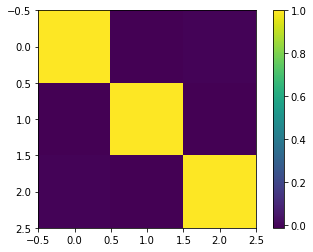

In [63]:
CR = corr(X)
print(CR)
fig=plt.figure()
plt.imshow(CR)
plt.colorbar()